# Vehicle Insurance Fraud Detection

![Picture title](image-20220921-150505.png)

# Problem Statement

Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('fraud_oracle.csv')

In [3]:
#Let's see how the data looks like
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [4]:
df.shape

(15420, 33)

Observation: Shape function depicts that there are 15420 rows and 33 columns in our dataset

In [5]:
df.tail()

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
15415  External                 none            no change     1 vehicle  1996   
15416  External          more than 5            no change        3 to 4  1996   
15417  External               1 to 2            no change     1 vehicle  1996   
15418  External          more than 5            no change     1 vehicle  1996   
15419  External               1 to 2            no change     1 vehicle  1996   

       BasePolicy  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[5 rows x 33 columns]

Observation: Tail function basically shows last five rows of the datasets

In [6]:
#looking columns
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
#Checking Missing values
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Observation: There is no missing value in the entire dataset

# Visualizing Missing values

In [8]:
!pip install missingno

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
import missingno as msno


<AxesSubplot:>

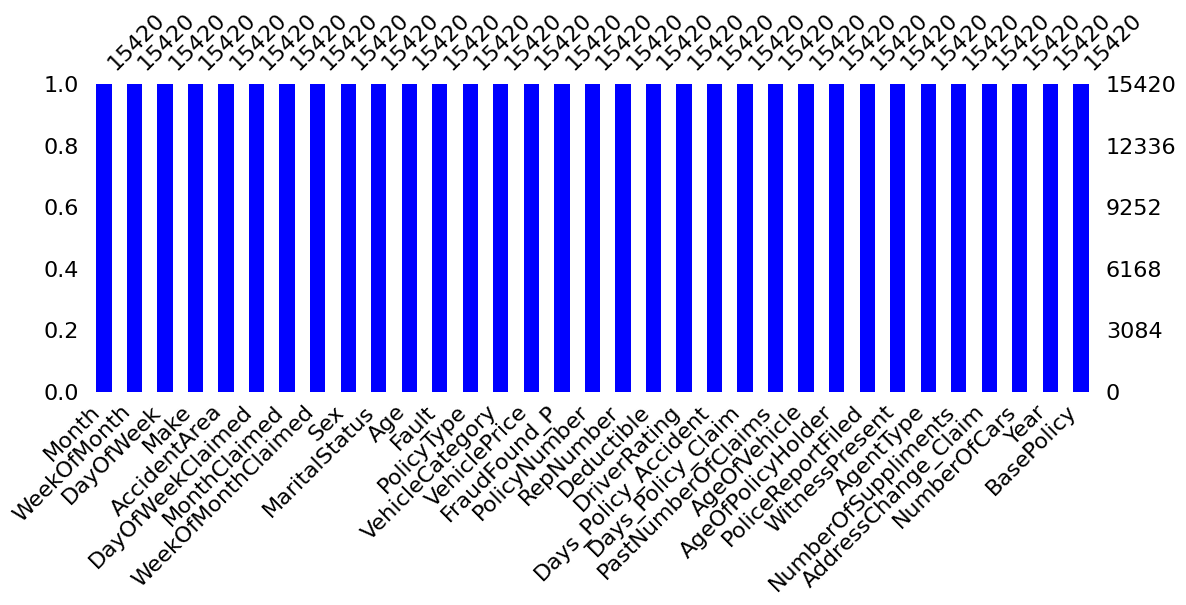

In [10]:
msno.bar(df,figsize=(13,4),color='Blue')

Observation: Missingno library is used for visualizing missing data and it is already found above that there is no missing values in the data, so we will proceed further with Exploratory Data Analysis process

In [11]:
#Removing unwanted columns
df.drop(['AccidentArea','PolicyNumber','RepNumber','Deductible','Days_Policy_Accident','Days_Policy_Claim','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','BasePolicy','Month','WeekOfMonth','DayOfWeek'],axis=1,inplace=True)

In [12]:
df.shape

(15420, 19)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                15420 non-null  object
 1   DayOfWeekClaimed    15420 non-null  object
 2   MonthClaimed        15420 non-null  object
 3   WeekOfMonthClaimed  15420 non-null  int64 
 4   Sex                 15420 non-null  object
 5   MaritalStatus       15420 non-null  object
 6   Age                 15420 non-null  int64 
 7   Fault               15420 non-null  object
 8   PolicyType          15420 non-null  object
 9   VehicleCategory     15420 non-null  object
 10  VehiclePrice        15420 non-null  object
 11  FraudFound_P        15420 non-null  int64 
 12  DriverRating        15420 non-null  int64 
 13  PastNumberOfClaims  15420 non-null  object
 14  AgeOfVehicle        15420 non-null  object
 15  AgeOfPolicyHolder   15420 non-null  object
 16  PoliceReportFiled   15

In [14]:
df.head()

Make DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex  \
0   Honda          Tuesday          Jan                   1  Female   
1   Honda           Monday          Jan                   4    Male   
2   Honda         Thursday          Nov                   2    Male   
3  Toyota           Friday          Jul                   1    Male   
4   Honda          Tuesday          Feb                   2  Female   

  MaritalStatus  Age          Fault         PolicyType VehicleCategory  \
0        Single   21  Policy Holder  Sport - Liability           Sport   
1        Single   34  Policy Holder  Sport - Collision           Sport   
2       Married   47  Policy Holder  Sport - Collision           Sport   
3       Married   65    Third Party  Sedan - Liability           Sport   
4        Single   27    Third Party  Sport - Collision           Sport   

      VehiclePrice  FraudFound_P  DriverRating PastNumberOfClaims  \
0  more than 69000             0             1               none   
1  more than 69000             0             4               none   
2  more than 69000             0             3                  1   
3   20000 to 29000             0             2                  1   
4  more than 69000             0             1               none   

  AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled NumberOfCars  Year  
0      3 years          26 to 30                No       3 to 4  1994  
1      6 years          31 to 35               Yes    1 vehicle  1994  
2      7 years          41 to 50                No    1 vehicle  1994  
3  more than 7          51 to 65               Yes    1 vehicle  1994  
4      5 years          31 to 35                No    1 vehicle  1994

In [15]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [16]:
# having a look at our numeric columns with describe functiondf.describe()

WeekOfMonthClaimed           Age  FraudFound_P  DriverRating  \
count        15420.000000  15420.000000  15420.000000  15420.000000   
mean             2.693969     39.855707      0.059857      2.487808   
std              1.259115     13.492377      0.237230      1.119453   
min              1.000000      0.000000      0.000000      1.000000   
25%              2.000000     31.000000      0.000000      1.000000   
50%              3.000000     38.000000      0.000000      2.000000   
75%              4.000000     48.000000      0.000000      3.000000   
max              5.000000     80.000000      1.000000      4.000000   

               Year  
count  15420.000000  
mean    1994.866472  
std        0.803313  
min     1994.000000  
25%     1994.000000  
50%     1995.000000  
75%     1996.000000  
max     1996.000000

In [17]:
#having a look at our Target column
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [18]:
import matplotlib

In [19]:
import matplotlib.pyplot as plt

In [20]:
df.dtypes.value_counts()

object    14
int64      5
dtype: int64

In [21]:
#checking our Categorical columns
df.select_dtypes(include='object').count()

Make                  15420
DayOfWeekClaimed      15420
MonthClaimed          15420
Sex                   15420
MaritalStatus         15420
Fault                 15420
PolicyType            15420
VehicleCategory       15420
VehiclePrice          15420
PastNumberOfClaims    15420
AgeOfVehicle          15420
AgeOfPolicyHolder     15420
PoliceReportFiled     15420
NumberOfCars          15420
dtype: int64

In [22]:
df.drop(['AgeOfPolicyHolder'],axis=1,inplace=True)

In [23]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                15420 non-null  object
 1   DayOfWeekClaimed    15420 non-null  object
 2   MonthClaimed        15420 non-null  object
 3   WeekOfMonthClaimed  15420 non-null  int64 
 4   Sex                 15420 non-null  object
 5   MaritalStatus       15420 non-null  object
 6   Age                 15420 non-null  int64 
 7   Fault               15420 non-null  object
 8   PolicyType          15420 non-null  object
 9   VehicleCategory     15420 non-null  object
 10  VehiclePrice        15420 non-null  object
 11  FraudFound_P        15420 non-null  int64 
 12  DriverRating        15420 non-null  int64 
 13  PastNumberOfClaims  15420 non-null  object
 14  AgeOfVehicle        15420 non-null  object
 15  PoliceReportFiled   15420 non-null  object
 16  NumberOfCars        15

In [25]:
df['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

ValueError: could not convert string to float: 'Honda'

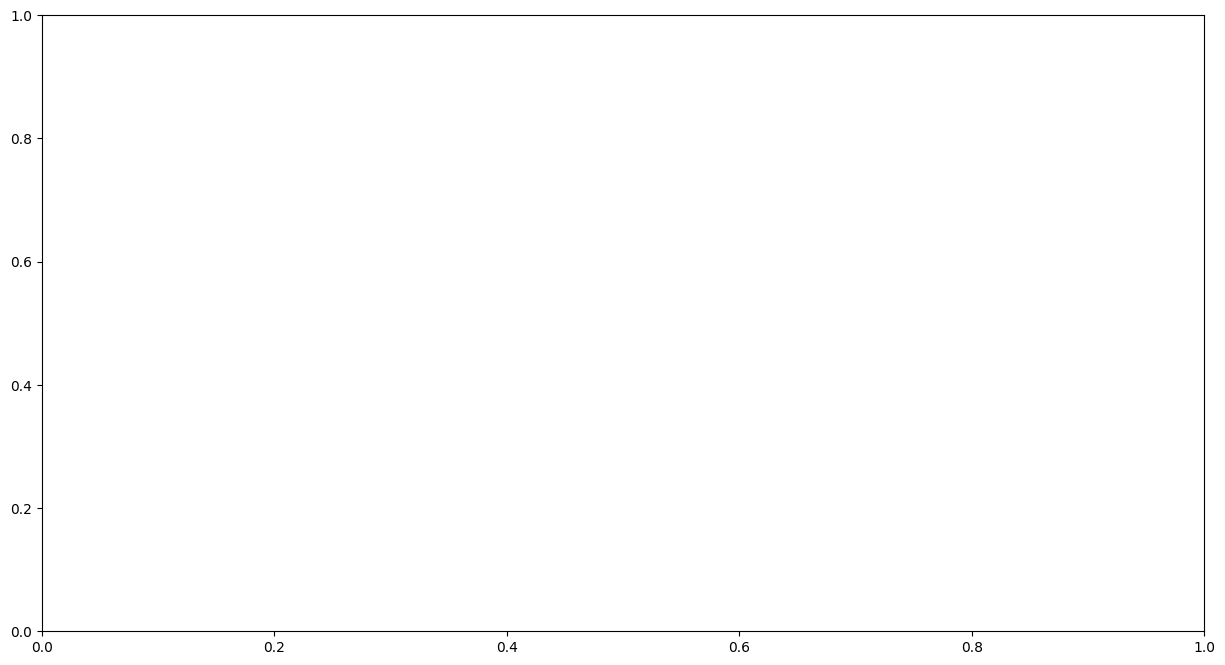

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['Make'])

Looking at the above graph Pontiac car is the most insured car with this Insurance company.

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['Sex'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

Males are the one with most number of claims filed.

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['Age'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

Above plot defines that mostly policyholder's are aged between 26 to 45 years

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

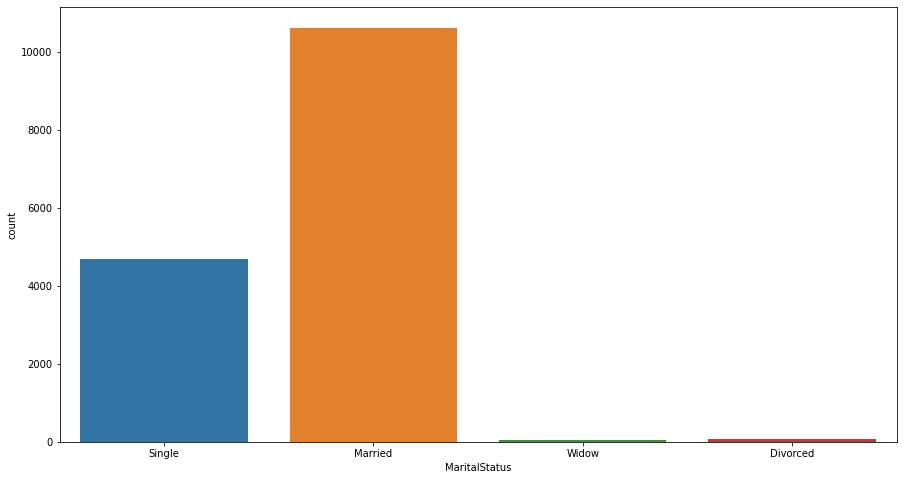

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['MaritalStatus'])

Married people are the one who has filed more number of claims

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fault', ylabel='count'>

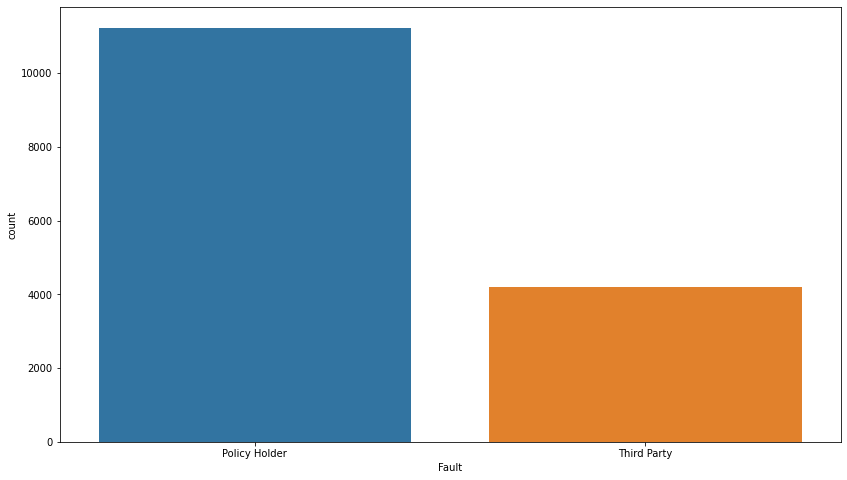

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(df['Fault'])

Most number of faults are done by the Policyholder's

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PolicyType', ylabel='count'>

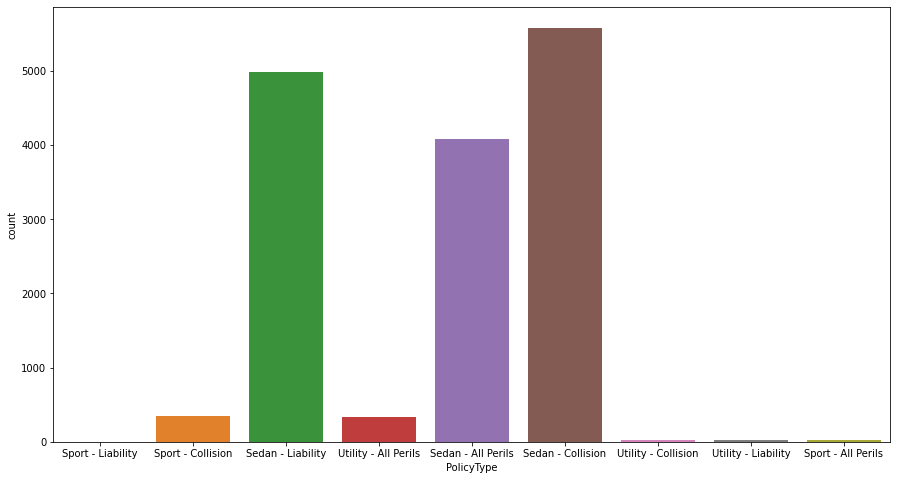

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['PolicyType'])

Looking at the above analysis we can say that maximum number of claims are received on Sedan type of vehicles

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VehicleCategory', ylabel='count'>

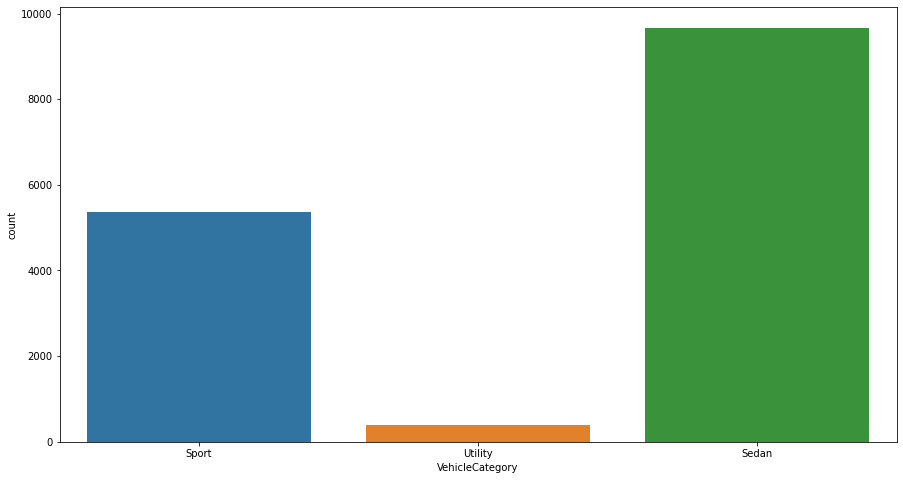

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['VehicleCategory'])

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['VehiclePrice'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VehiclePrice', ylabel='count'>

Most of the vehicles are between 20000 to 29000

In [ ]:
df.columns

Index(['Make', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'NumberOfCars', 'Year'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['PastNumberOfClaims'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PastNumberOfClaims', ylabel='count'>

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeOfVehicle', ylabel='count'>

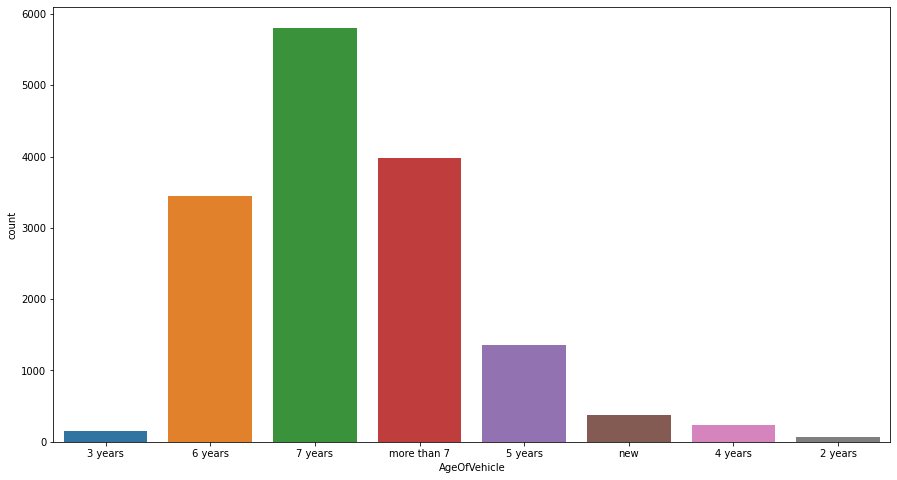

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['AgeOfVehicle'])

Most of the vehicles are 7 years 

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PoliceReportFiled', ylabel='count'>

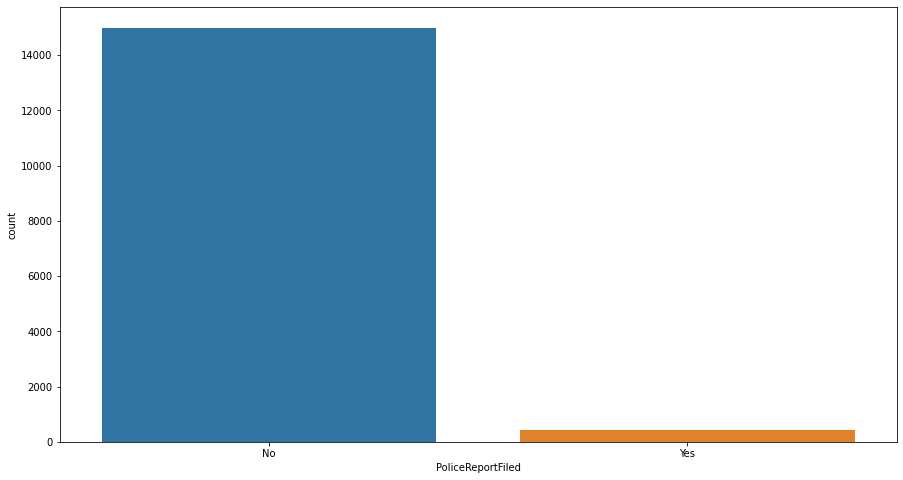

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['PoliceReportFiled'])

It seems that 90% of the time after vehicle stole or collision policyholder does not report or file police case

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfCars', ylabel='count'>

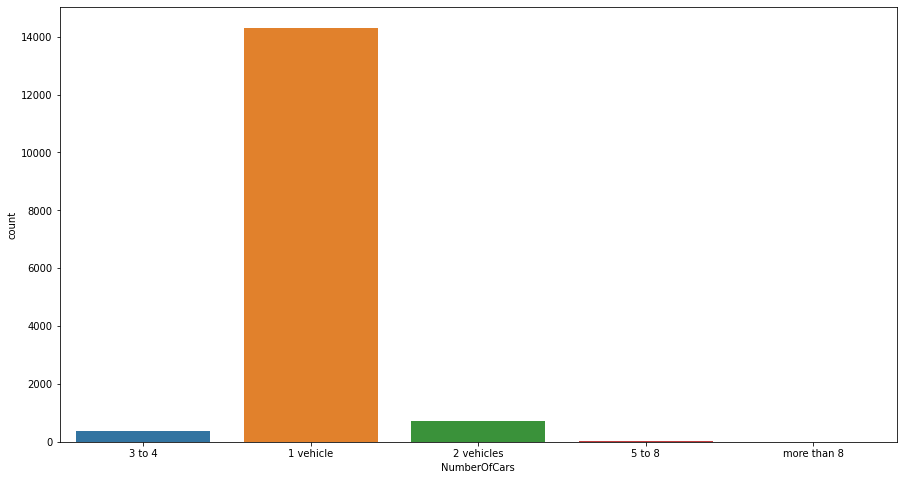

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['NumberOfCars'])

<AxesSubplot:ylabel='DayOfWeekClaimed'>

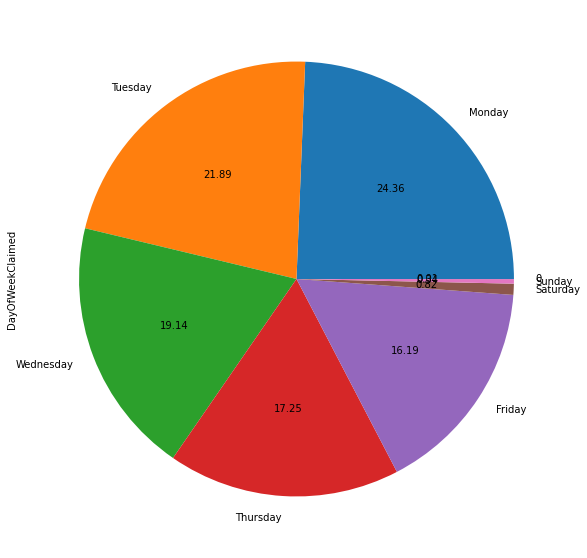

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df['DayOfWeekClaimed'].value_counts().plot(kind='pie',autopct='%.2f')

No such relationship is observed incase of Day of the Claim filed

<AxesSubplot:ylabel='MonthClaimed'>

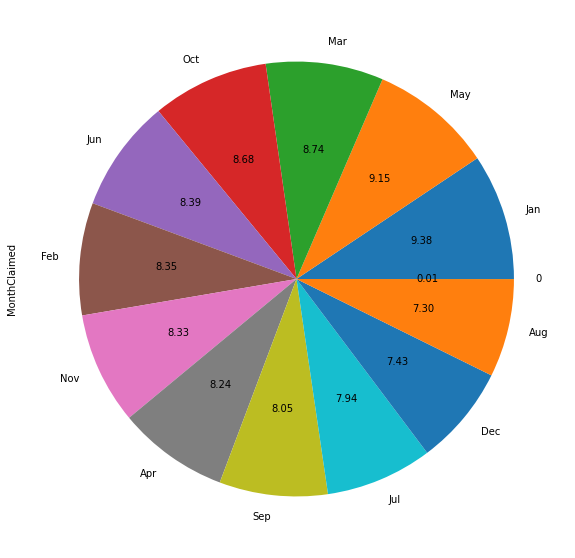

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df['MonthClaimed'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='WeekOfMonthClaimed'>

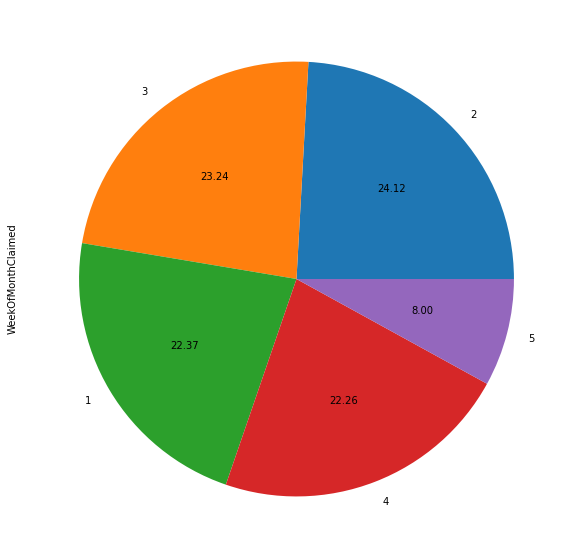

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df['WeekOfMonthClaimed'].value_counts().plot(kind='pie',autopct='%.2f')

# Visualization on Numeric Columns

(array([ 320.,    0.,  497., 3572., 3895., 3012., 2224., 1111.,  485.,
         304.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

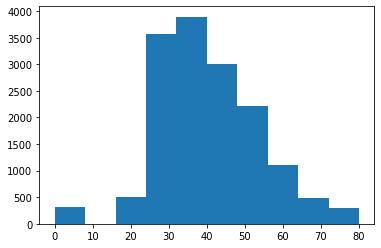

In [ ]:
plt.hist(df['Age'])

In [ ]:
sns.distplot(df['Age'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

## EDA using Bivariate and Multivariate Analysis

In [ ]:
#Scatterplot-(Numerical-Numerical)

### 

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='FraudFound_P'>

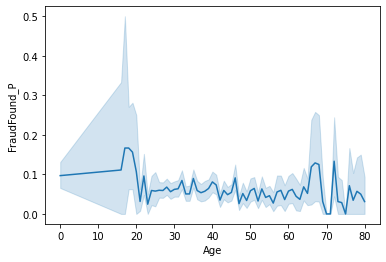

In [ ]:
sns.lineplot(df['Age'],df['FraudFound_P'])

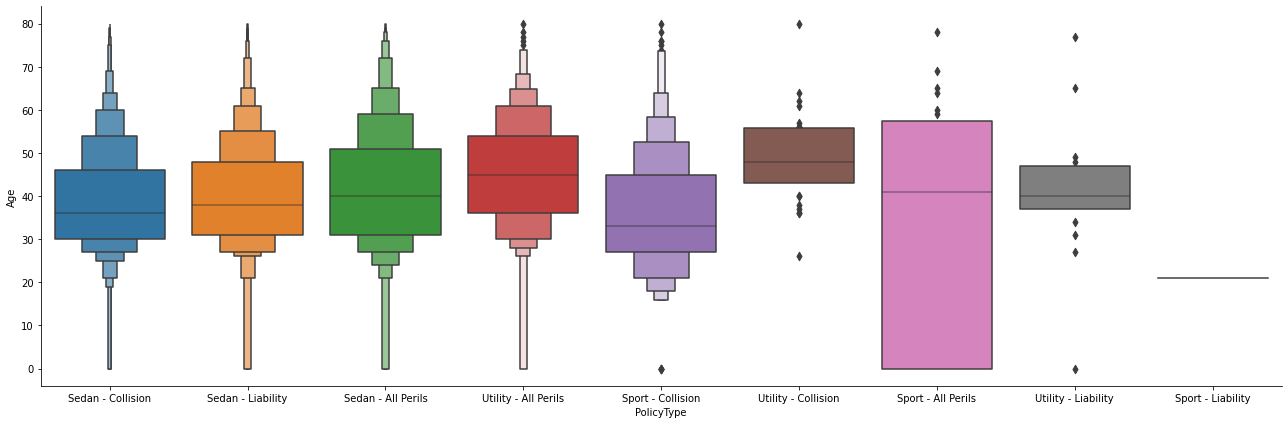

In [ ]:
sns.catplot(y ='Age',x='PolicyType',data=df.sort_values("Age",ascending = False),kind="boxen",height = 6,aspect = 3)
plt.show()

<AxesSubplot:xlabel='VehicleCategory', ylabel='Sex'>

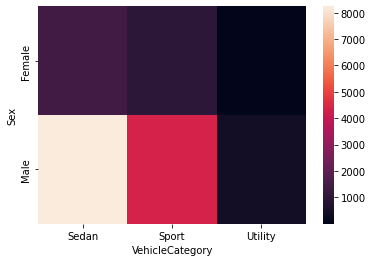

In [ ]:
pd.crosstab(df['Sex'],df['VehicleCategory'])
sns.heatmap(pd.crosstab(df['Sex'],df['VehicleCategory']))

Heatmap shows there is high correlation between Males & Sedan class of vehicles. As we saw above most claims are filed by males and that too for Sedan class of collision which draws our attention towards male policyholder incase of any Frauds.

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

<AxesSubplot:>

In [ ]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [ ]:
df.columns

Index(['Make', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'NumberOfCars', 'Year'],
      dtype='object')

In [ ]:
df.head()

Make DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex  \
0   Honda          Tuesday          Jan                   1  Female   
1   Honda           Monday          Jan                   4    Male   
2   Honda         Thursday          Nov                   2    Male   
3  Toyota           Friday          Jul                   1    Male   
4   Honda          Tuesday          Feb                   2  Female   

  MaritalStatus  Age          Fault         PolicyType VehicleCategory  \
0        Single   21  Policy Holder  Sport - Liability           Sport   
1        Single   34  Policy Holder  Sport - Collision           Sport   
2       Married   47  Policy Holder  Sport - Collision           Sport   
3       Married   65    Third Party  Sedan - Liability           Sport   
4        Single   27    Third Party  Sport - Collision           Sport   

      VehiclePrice  FraudFound_P  DriverRating PastNumberOfClaims  \
0  more than 69000             0             1               none   
1  more than 69000             0             4               none   
2  more than 69000             0             3                  1   
3   20000 to 29000             0             2                  1   
4  more than 69000             0             1               none   

  AgeOfVehicle PoliceReportFiled NumberOfCars  Year  
0      3 years                No       3 to 4  1994  
1      6 years               Yes    1 vehicle  1994  
2      7 years                No    1 vehicle  1994  
3  more than 7               Yes    1 vehicle  1994  
4      5 years                No    1 vehicle  1994

In [ ]:
df['FraudFound_P'].unique()

array([0, 1])

In [ ]:
df.shape

(15420, 18)

### Doing One Hot Encoding on our Categorical variables

In [ ]:
new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
new_df.head()

WeekOfMonthClaimed  Age  FraudFound_P  DriverRating  Year  Make_BMW  \
0                   1   21             0             1  1994         0   
1                   4   34             0             4  1994         0   
2                   2   47             0             3  1994         0   
3                   1   65             0             2  1994         0   
4                   2   27             0             1  1994         0   

   Make_Chevrolet  Make_Dodge  Make_Ferrari  Make_Ford  ...  \
0               0           0             0          0  ...   
1               0           0             0          0  ...   
2               0           0             0          0  ...   
3               0           0             0          0  ...   
4               0           0             0          0  ...   

   AgeOfVehicle_5 years  AgeOfVehicle_6 years  AgeOfVehicle_7 years  \
0                     0                     0                     0   
1                     0                     1                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     1                     0                     0   

   AgeOfVehicle_more than 7  AgeOfVehicle_new  PoliceReportFiled_Yes  \
0                         0                 0                      0   
1                         0                 0                      1   
2                         0                 0                      0   
3                         1                 0                      1   
4                         0                 0                      0   

   NumberOfCars_2 vehicles  NumberOfCars_3 to 4  NumberOfCars_5 to 8  \
0                        0                    1                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   

   NumberOfCars_more than 8  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 77 columns]

In [ ]:
#lets look at how many labels in colums we have
# for col in df.columns:
    # print(col,': ',len(df[col].unique()),'labels')

In [ ]:
#df.Make.value_counts().sort_values(ascending=False).head(20)

In [27]:
new_df.sample(5)

NameError: name 'new_df' is not defined

In [ ]:
!pip install xgboost

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install catboost==1.0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 14.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Importing Libraries

In [ ]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import plotly.express as px
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
X = new_df.drop(['FraudFound_P','Year'],axis=1).values
y = new_df['FraudFound_P'].values

In [ ]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

In [ ]:
classifier = RandomForestClassifier

### Handling Imbalance data using SMOTE

In [ ]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4),classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

In [ ]:
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 14497, 1: 923})
SMOTE data distribution: Counter({0: 14497, 1: 14497})


### Evaluating Model for SMOTE + Random Forest 

In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[2871   30]
 [ 176    7]]

SMOTE Pipeline Score 0.9332036316472114

SMOTE + RandomForest classification
accuracy: 0.9332036316472114
precision: 0.1891891891891892
recall: 0.03825136612021858
f2: 0.04551365409622887


In [ ]:
!pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [ ]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.05405405405405406
{'max_depth': None, 'max_features': 8, 'n_estimators': 3}


In [ ]:
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [ ]:
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9400129701686122


In [ ]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[[2901    0]
 [ 183    0]]
RF classification
accuracy: 0.9406614785992218
precision: 0.0
recall: 0.0
f2: 0.0


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
X = new_df.drop(['FraudFound_P','Year'],axis=1)
y = new_df['FraudFound_P']

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_dt.score(X_test,y_test)

0.9393644617380026

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



### Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [ ]:
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

Training accuracy of Support Vector Classifier is : 0.9400129701686122
Test accuracy of Support Vector Classifier is : 0.9406614785992218


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2901    0]
 [ 183    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

### K Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

Training accuracy of KNN is : 0.9400129701686122
Test accuracy of KNN is : 0.9406614785992218


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2901    0]
 [ 183    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

### Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.940742542153048
Test Accuracy of Gradient Boosting Classifier is 0.940337224383917 

Confusion Matrix :- 
[[2900    1]
 [ 183    0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



### XgBoost Classifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.9597114137483788
Test accuracy of XgBoost is : 0.9374189364461738
[[2885   16]
 [ 177    6]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2901
           1       0.27      0.03      0.06       183

    accuracy                           0.94      3084
   macro avg       0.61      0.51      0.51      3084
weighted avg       0.90      0.94      0.91      3084



### CatBoost Classifier

In [ ]:
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.2869421	total: 67.1ms	remaining: 604ms
1:	learn: 0.2100072	total: 72.7ms	remaining: 291ms
2:	learn: 0.2007334	total: 78.7ms	remaining: 184ms
3:	learn: 0.1969998	total: 84ms	remaining: 126ms
4:	learn: 0.1892571	total: 89.6ms	remaining: 89.6ms
5:	learn: 0.1870732	total: 96.6ms	remaining: 64.4ms
6:	learn: 0.1858061	total: 101ms	remaining: 43.3ms
7:	learn: 0.1841841	total: 105ms	remaining: 26.3ms
8:	learn: 0.1819849	total: 111ms	remaining: 12.3ms
9:	learn: 0.1801089	total: 115ms	remaining: 0us


In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9400129701686122
Test Accuracy of Cat Boost Classifier is 0.9406614785992218 

Confusion Matrix :- 
[[2901    0]
 [ 183    0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are 

### ExtraTree Classifier

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 0.9998378728923476
Test Accuracy of Extra Trees Classifier is 0.9390402075226978 

Confusion Matrix :- 
[[2892    9]
 [ 179    4]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.31      0.02      0.04       183

    accuracy                           0.94      3084
   macro avg       0.62      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



### Light Gradient Boosting Machine(LGBM)

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 0.9315823605706874
Test Accuracy of LGBM Classifier is 0.9082360570687419 

[[2780  121]
 [ 162   21]]

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2901
           1       0.15      0.11      0.13       183

    accuracy                           0.91      3084
   macro avg       0.55      0.54      0.54      3084
weighted avg       0.90      0.91      0.90      3084



### Voting Classifier

In [ ]:
classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', model_dt), ('Random Forest', rf),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.2869421	total: 4.97ms	remaining: 44.8ms
1:	learn: 0.2100072	total: 9.68ms	remaining: 38.7ms
2:	learn: 0.2007334	total: 14ms	remaining: 32.7ms
3:	learn: 0.1969998	total: 18.3ms	remaining: 27.4ms
4:	learn: 0.1892571	total: 22.8ms	remaining: 22.8ms
5:	learn: 0.1870732	total: 27.5ms	remaining: 18.3ms
6:	learn: 0.1858061	total: 33.6ms	remaining: 14.4ms
7:	learn: 0.1841841	total: 37.9ms	remaining: 9.47ms
8:	learn: 0.1819849	total: 42.3ms	remaining: 4.7ms
9:	learn: 0.1801089	total: 46.6ms	remaining: 0us
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [ ]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Training accuracy of Voting Classifier is : 0.9400940337224384
Test accuracy of Voting Classifier is : 0.9406614785992218
[[2901    0]
 [ 183    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2901
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.8

### Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Gradient Boost', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc,gb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
0                SVC  0.940661
1                KNN  0.940661
3          Cat Boost  0.940661
7  Voting Classifier  0.940661
2     Gradient Boost  0.940337
4        Extra Trees  0.939040
6            XgBoost  0.937419
5               LGBM  0.908236

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b7ca53f8-ce0c-45ac-a46a-5b2903bda881' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>